# Classification

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [2]:
home_path = os.path.abspath(os.getcwd())
home_path

'c:\\Users\\User\\OneDrive\\Documenti\\Uni_nuovo\\Necst\\NL2project\\FDAxEEG\\Dataset'

Integral:
* Zona: 1 Banda: 2
* Zona: 1 Banda: 3
* Zona: 6 Banda: 0
* Zona: 6 Banda: 1
  
Norm:
* Zona: 1 Banda: 0
* Zona: 1 Banda: 2
* Zona: 1 Banda: 3
* Zona: 6 Banda: 0
* Zona: 6 Banda: 1

Max:
* Zona: 1 Banda: 2
* Zona: 1 Banda: 3
* Zona: 3 Banda: 4
* Zona: 6 Banda: 0
* Zona: 6 Banda: 1

In [10]:
colnames = ['int_z1_b2', 'int_z1_b3', 
            'int_z6_b0', 'int_z6_b1', 
            'norm_z1_b0', 'norm_z1_b2',
            'norm_z1_b3', 'norm_z6_b0', 
            'norm_z6_b1',
            'max_z1_b2','max_z1_b3', 
            'max_z3_b4','max_z6_b0', 
            'max_z6_b1']


In [11]:
# creating the vector of the labels
y = np.append(np.ones((555, 1), dtype=int),np.zeros((427, 1), dtype=int))

### Qui  crea dataframes

In [5]:
# concatenating dataframe degli integrali delle derivate
int_adhd = pd.read_csv(home_path+'\Bonf_Feat_int_adhd.csv', sep = ',')
int_cont = pd.read_csv(home_path+'\Bonf\Feat_int_cont.csv', sep = ',')

df_int = pd.concat([int_adhd, int_cont])
df_int.shape

(982, 4)

In [6]:
# concatenating dataframe delle norme
norm_adhd = pd.read_csv(home_path+'\Bonf_Feat_norm_adhd.csv', sep = ',')
norm_cont = pd.read_csv(home_path+'\Bonf_Feat_norm_cont.csv', sep = ',')

df_norm = pd.concat([norm_adhd, norm_cont])
df_norm.shape

(982, 5)

In [7]:
# concatenating dataframe dei maxchi
maxco_adhd = pd.read_csv(home_path+'\Bonf_Feat_maxco_adhd.csv', sep = ',')
maxco_cont = pd.read_csv(home_path+'\Bonf_Feat_maxco_cont.csv', sep = ',')

df_maxco = pd.concat([maxco_adhd, maxco_cont])
df_maxco.shape

(982, 5)

In [8]:
# concatenating the three daframes along the columns

df = pd.concat([df_int, df_norm, df_maxco], axis=1)
df.shape

(982, 14)

In [12]:
df.columns = colnames
df.head()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b2,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z1_b2,max_z1_b3,max_z3_b4,max_z6_b0,max_z6_b1
0,927.151960,2501.529995,24.198602,129.886119,44.846112,733.046185,1820.427313,44.268894,173.354080,368.676758,1262.890259,5884.943848,11.715752,58.981052
1,753.313695,1584.194779,49.278778,222.241724,34.186575,616.225203,1163.909000,52.006889,223.797745,254.854523,697.317871,3458.279297,14.928400,84.580544
2,819.394027,1317.382080,27.224983,211.900858,33.425988,633.956804,996.891079,45.719299,216.256989,292.136841,599.598999,2358.657715,8.690989,80.464485
3,853.109891,1251.061716,29.762903,181.486521,49.384021,704.682143,921.627300,48.815273,219.864517,300.478455,610.236328,2198.085449,11.514561,80.033195
4,918.740565,1327.294711,47.566680,185.767107,54.446815,720.013432,979.173259,67.198456,251.180038,342.757507,585.753784,3440.830078,16.043320,65.653732


In [15]:
df.describe()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b2,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z1_b2,max_z1_b3,max_z3_b4,max_z6_b0,max_z6_b1
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,786.828309,1729.909969,36.667484,151.874980,76.391956,677.814353,1313.181770,57.094812,180.480990,293.903519,827.243203,2150.790801,14.542753,57.089302
std,489.447881,1020.748493,45.840826,156.836041,56.512006,412.909174,779.965916,58.933834,165.591446,199.287048,508.503254,7055.684559,17.901093,61.358527
min,125.979593,332.507867,1.664147,9.523061,16.852755,130.267696,248.083413,3.194101,11.250491,45.807602,166.970505,220.923737,0.733928,3.719572
25%,446.093399,978.249564,14.663219,61.177631,45.583667,390.172312,729.106910,24.985119,80.267145,156.224266,444.293869,771.995499,5.555747,21.915535
50%,683.433742,1527.523893,24.969449,107.595929,60.386190,595.420440,1165.852590,42.643131,134.687653,250.230995,718.150482,1261.787354,9.748687,39.193304
75%,966.728202,2265.128936,42.462567,180.823713,87.180999,846.982544,1715.168000,66.705938,223.221157,369.173363,1089.091614,1937.094849,16.352236,67.510569
max,3768.216468,8730.755084,592.036389,1534.958498,545.280224,3189.913228,6699.492035,623.827820,1521.175781,1615.053467,3866.018799,183763.468750,185.035690,467.562347


In [13]:
df.to_csv(home_path+'\Bonf_df_complete.csv', index = False, sep = ',')

### Qui carico dataframe già fatto

In [67]:
df = pd.read_csv(home_path+'\Bonf_df_complete.csv', sep = ',')
df.head()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b2,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z1_b2,max_z1_b3,max_z3_b4,max_z6_b0,max_z6_b1
0,927.151960,2501.529995,24.198602,129.886119,44.846112,733.046185,1820.427313,44.268894,173.354080,368.676758,1262.890259,5884.943848,11.715752,58.981052
1,753.313695,1584.194779,49.278778,222.241724,34.186575,616.225203,1163.909000,52.006889,223.797745,254.854523,697.317871,3458.279297,14.928400,84.580544
2,819.394027,1317.382080,27.224983,211.900858,33.425988,633.956804,996.891079,45.719299,216.256989,292.136841,599.598999,2358.657715,8.690989,80.464485
3,853.109891,1251.061716,29.762903,181.486521,49.384021,704.682143,921.627300,48.815273,219.864517,300.478455,610.236328,2198.085449,11.514561,80.033195
4,918.740565,1327.294711,47.566680,185.767107,54.446815,720.013432,979.173259,67.198456,251.180038,342.757507,585.753784,3440.830078,16.043320,65.653732


Vediamo un po' come sono questi dati

<AxesSubplot:xlabel='max_z6_b1', ylabel='Count'>

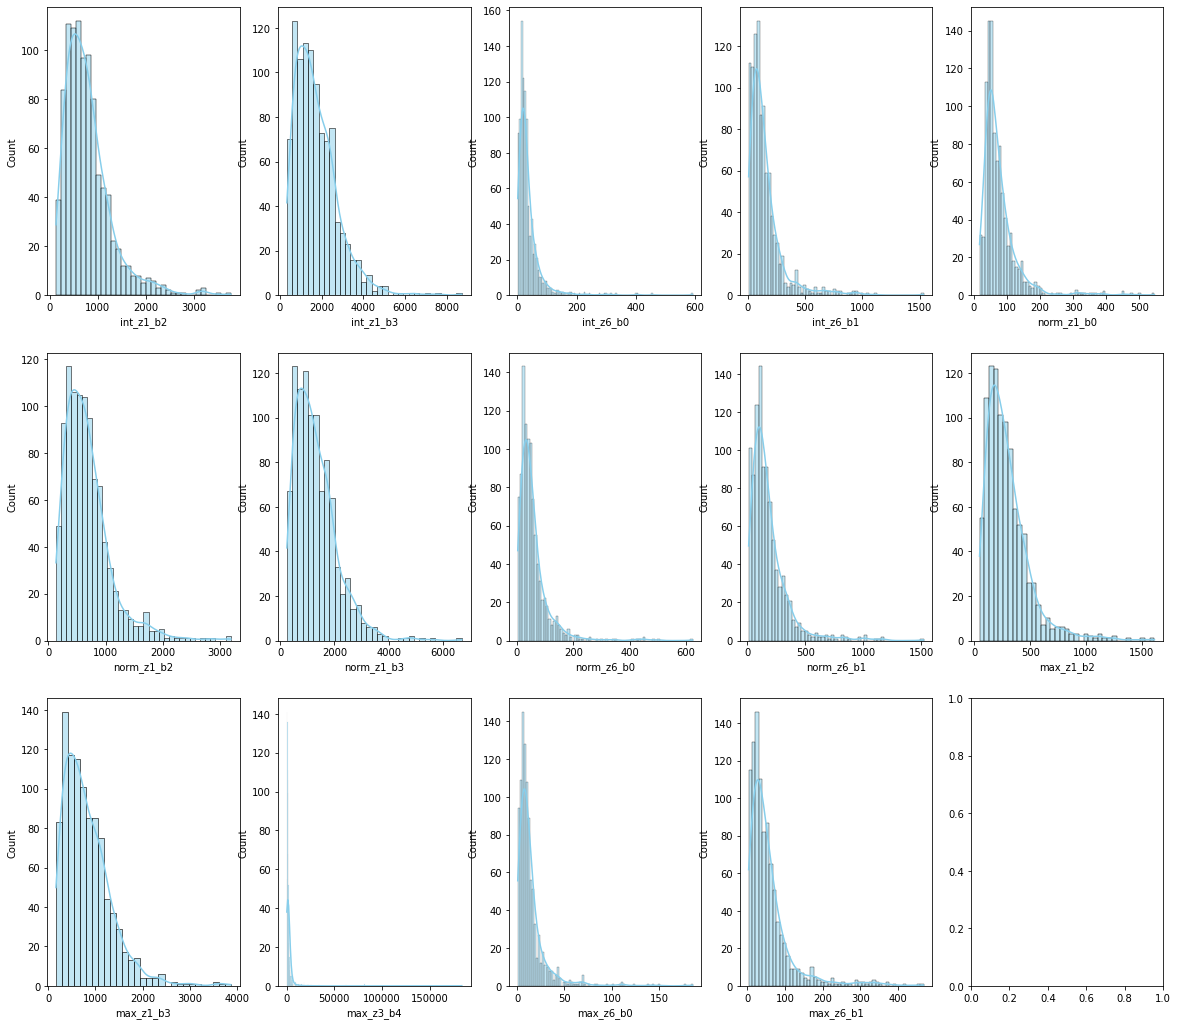

In [46]:
fig, axs = plt.subplots(3, 5, figsize=(20, 18))

sns.histplot(data=df[colnames[0]], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df[colnames[1]], kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df[colnames[2]], kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df[colnames[3]], kde=True, color="skyblue", ax=axs[0, 3])
sns.histplot(data=df[colnames[4]], kde=True, color="skyblue", ax=axs[0, 4])
sns.histplot(data=df[colnames[5]], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df[colnames[6]], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df[colnames[7]], kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=df[colnames[8]], kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=df[colnames[9]], kde=True, color="skyblue", ax=axs[1, 4])
sns.histplot(data=df[colnames[10]], kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df[colnames[11]], kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=df[colnames[12]], kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=df[colnames[13]], kde=True, color="skyblue", ax=axs[2, 3])

Provo a normalizzarli un po' con la log transfor

In [68]:
df_log = np.log(df)

<AxesSubplot:xlabel='max_z6_b1', ylabel='Count'>

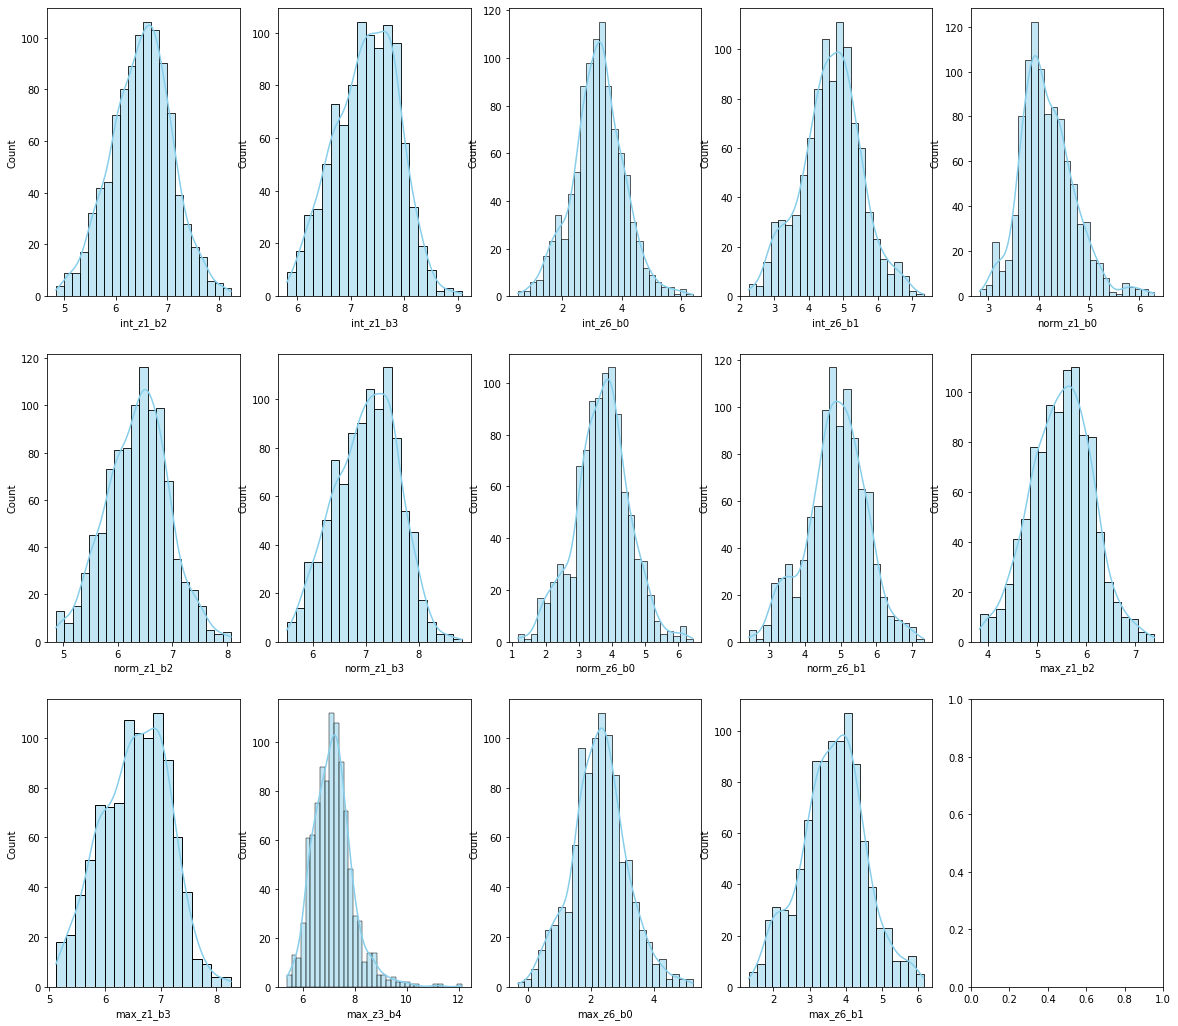

In [48]:
fig, axs = plt.subplots(3, 5, figsize=(20, 18))

sns.histplot(data=df_log[colnames[0]], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_log[colnames[1]], kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df_log[colnames[2]], kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df_log[colnames[3]], kde=True, color="skyblue", ax=axs[0, 3])
sns.histplot(data=df_log[colnames[4]], kde=True, color="skyblue", ax=axs[0, 4])
sns.histplot(data=df_log[colnames[5]], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_log[colnames[6]], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df_log[colnames[7]], kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=df_log[colnames[8]], kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=df_log[colnames[9]], kde=True, color="skyblue", ax=axs[1, 4])
sns.histplot(data=df_log[colnames[10]], kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_log[colnames[11]], kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=df_log[colnames[12]], kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=df_log[colnames[13]], kde=True, color="skyblue", ax=axs[2, 3])

In [140]:
# df_log.to_csv(home_path+'\Bonf_df_log_complete.csv', index = False, sep = ',')


df_log = pd.read_csv(home_path+'\Bonf_df_log_complete.csv', sep = ',')
df_log.head()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b2,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z1_b2,max_z1_b3,max_z3_b4,max_z6_b0,max_z6_b1
0,6.832117,7.824658,3.186295,4.866658,3.803237,6.597209,7.506827,3.790282,5.155336,5.909920,7.141158,8.680152,2.460934,4.077216
1,6.624482,7.367832,3.897494,5.403766,3.531833,6.423612,7.059539,3.951376,5.410743,5.540693,6.547241,8.148526,2.703265,4.437704
2,6.708565,7.183402,3.304135,5.356119,3.509334,6.451981,6.904642,3.822521,5.376467,5.677222,6.396261,7.765848,2.162287,4.387816
3,6.748888,7.131748,3.393263,5.201181,3.899627,6.557747,6.826141,3.888043,5.393012,5.705376,6.413846,7.695342,2.443612,4.382441
4,6.823004,7.190898,3.862133,5.224494,3.997224,6.579270,6.886709,4.207650,5.526170,5.837023,6.372900,8.143468,2.775293,4.184394


In [ ]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
model = scaler.fit(df_log)
scaled_df = model.transform(df_log)

scaled_df = pd.DataFrame(scaled_df, columns = df_log.columns)

In [229]:
scaled_df = pd.concat([scaled_df,pd.DataFrame({'y': y})], axis=1)
# df_log_label['y'] = pd.Categorical(df_log_label['y'])

scaled_df['y'] = scaled_df.y.astype('category')
scaled_df.dtypes



int_z1_b2      float64
int_z1_b3      float64
int_z6_b0      float64
int_z6_b1      float64
norm_z1_b0     float64
norm_z1_b2     float64
norm_z1_b3     float64
norm_z6_b0     float64
norm_z6_b1     float64
max_z1_b2      float64
max_z1_b3      float64
max_z3_b4      float64
max_z6_b0      float64
max_z6_b1      float64
y             category
dtype: object

In [230]:
scaled_df.to_csv(home_path+'\Bonf_df_log_scaled_complete.csv', index = False, sep = ',')


# df_log_label = pd.read_csv(home_path+'\Bonf_df_log_label_complete.csv', sep = ',')
# df_log_label.head()

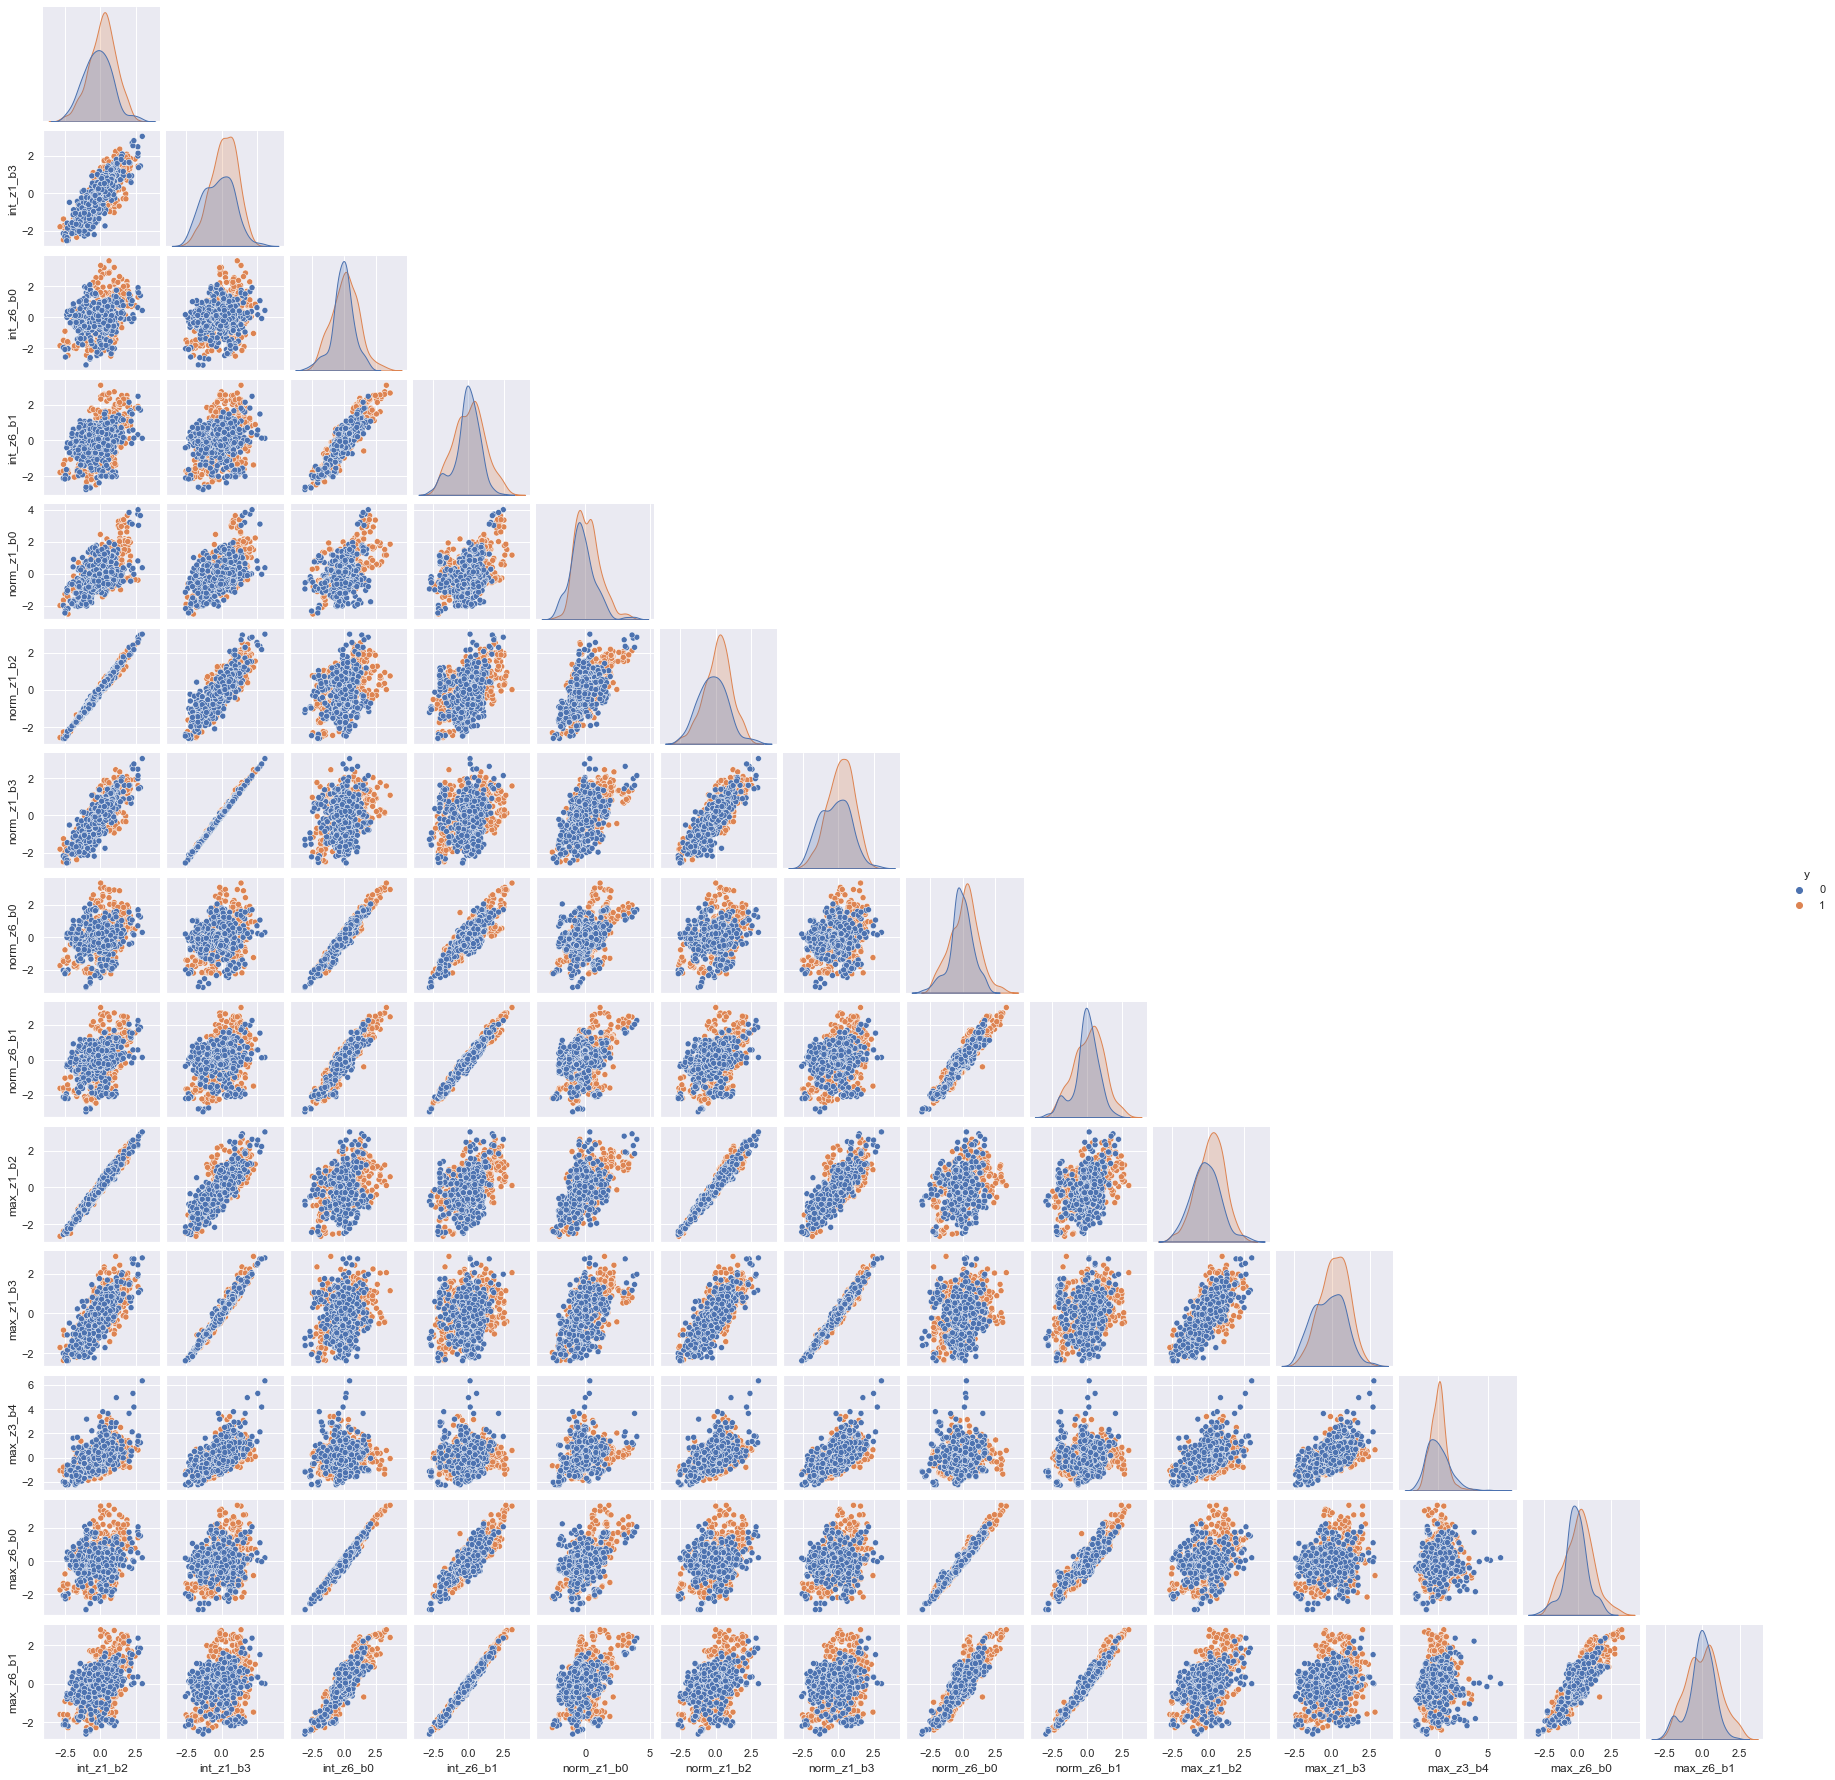

In [231]:
sns.pairplot(scaled_df, corner=True, height = 1.8, hue = 'y')

<AxesSubplot:>

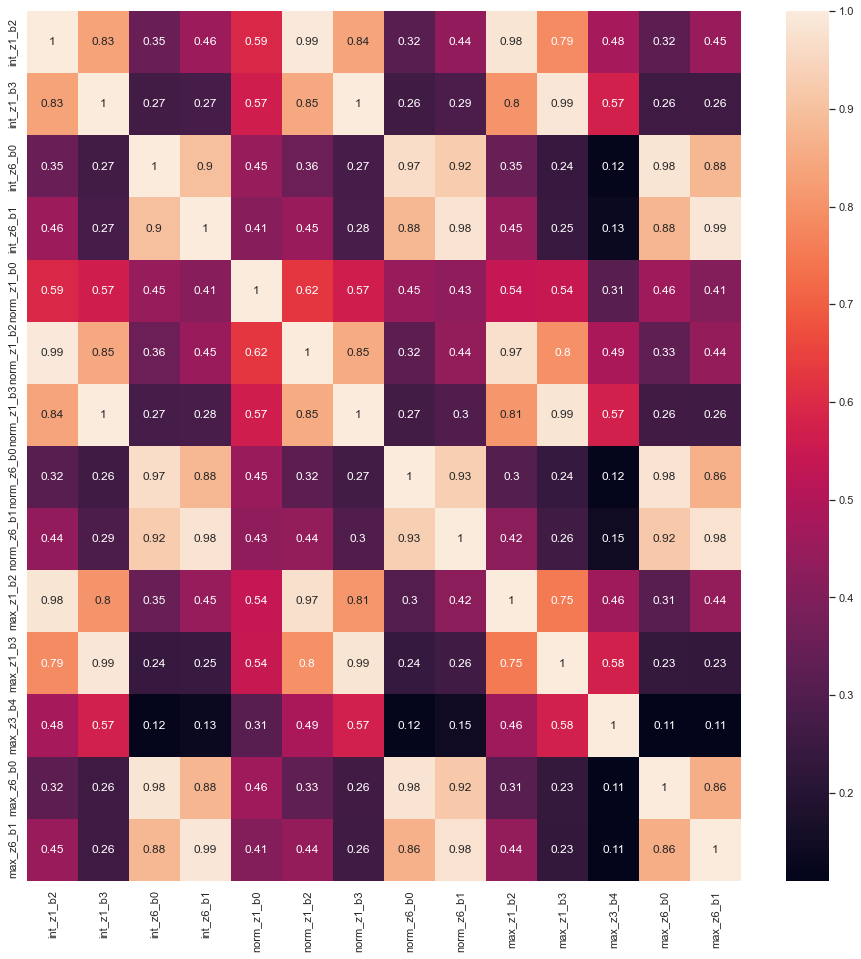

In [232]:
#define figure size
sns.set(rc={"figure.figsize":(16, 16)}) #width=16, height=16

sns.heatmap(df_log.corr(), annot=True)

Finding a couple of variables with correlation > 0.9 we chose to keep only one of the two

In [234]:
scaled_df.head()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b2,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z1_b2,max_z1_b3,max_z3_b4,max_z6_b0,max_z6_b1,y
0,0.569054,0.911829,-0.019728,0.250635,-0.691563,0.419556,0.838826,0.102346,0.344112,0.672424,0.996059,1.921532,0.219758,0.482631,1
1,0.213201,0.130205,0.798153,0.865710,-1.200248,0.114380,0.076942,0.298667,0.653761,0.080262,0.005563,1.241964,0.496439,0.885378,1
2,0.357306,-0.185352,0.115789,0.811147,-1.242418,0.164251,-0.186903,0.141634,0.612207,0.299226,-0.246233,0.752792,-0.121222,0.829642,1
3,0.426413,-0.273732,0.218286,0.633718,-0.510902,0.350184,-0.320617,0.221485,0.632264,0.344379,-0.216905,0.662666,0.199981,0.823637,1
4,0.553434,-0.172526,0.757488,0.660415,-0.327978,0.388020,-0.217449,0.610981,0.793702,0.555513,-0.285194,1.235498,0.578676,0.602373,1


In [237]:
scaled_no_lab = scaled_df.drop('y', axis = 1)

inx_remove = []
corr_mat = scaled_no_lab.corr()

for i in range(scaled_no_lab.shape[1]):
    inx = corr_mat[corr_mat.iloc[:,i]> 0.9].index[(i+1):]
    for el in inx:
        inx_remove.append(el)

inx_remove = np.unique(inx_remove)
inx_remove


array(['max_z1_b2', 'max_z1_b3', 'max_z6_b0', 'norm_z1_b2'], dtype='<U10')

In [238]:
scaled_drop = scaled_no_lab.drop(inx_remove, axis = 1)

In [239]:
scaled_drop.head()

,int_z1_b2,int_z1_b3,int_z6_b0,int_z6_b1,norm_z1_b0,norm_z1_b3,norm_z6_b0,norm_z6_b1,max_z3_b4,max_z6_b1
0,0.569054,0.911829,-0.019728,0.250635,-0.691563,0.838826,0.102346,0.344112,1.921532,0.482631
1,0.213201,0.130205,0.798153,0.865710,-1.200248,0.076942,0.298667,0.653761,1.241964,0.885378
2,0.357306,-0.185352,0.115789,0.811147,-1.242418,-0.186903,0.141634,0.612207,0.752792,0.829642
3,0.426413,-0.273732,0.218286,0.633718,-0.510902,-0.320617,0.221485,0.632264,0.662666,0.823637
4,0.553434,-0.172526,0.757488,0.660415,-0.327978,-0.217449,0.610981,0.793702,1.235498,0.602373


## Classification

In [240]:
np.random.seed(1234)

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(scaled_drop, y,
    test_size= 1/5.0, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

In [241]:
n_estimators = 100

In [242]:
method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators)

xval_score = cross_val_score(method, X_train_drop, y_train_drop, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.7655793573515093, 0.041505583347109985)

In [243]:
method.fit(X_train_drop, y_train_drop)

yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))


Accuracy: 0.7461928934010152
Precision: 0.8571428571428571
Recall: 0.7
F1 score: 0.7706422018348624


In [244]:
print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

[[84 36]
 [14 63]]
[[0.7        0.3       ]
 [0.18181818 0.81818182]]


<BarContainer object of 10 artists>

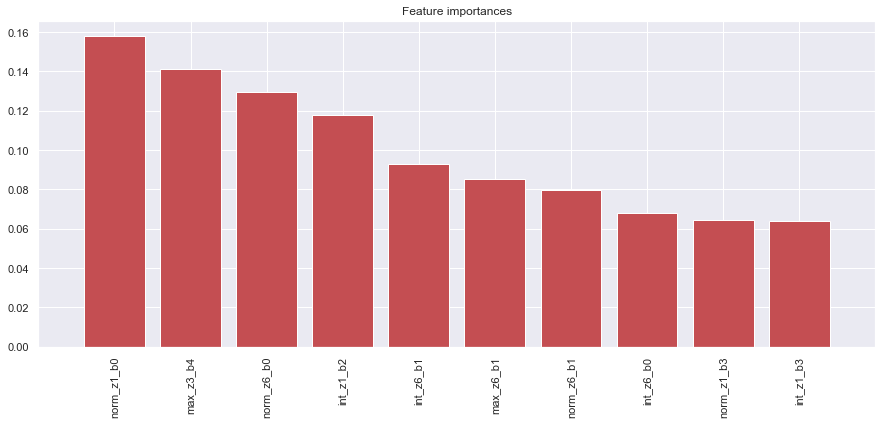

In [245]:
feat_imp = method.feature_importances_

indices = np.argsort(feat_imp)[::-1]

plt.rcParams["figure.figsize"] = (15,6)

plt.title("Feature importances")
plt.xticks(range(df_log_drop.shape[1]),df_log_drop.columns[indices],rotation='vertical')

plt.xlim([-1, df_log_drop.shape[1]])

plt.bar(range(df_log_drop.shape[1]), feat_imp[indices], color="r")


Prova invece con il dataset completo

In [246]:
X_train, X_test, y_train, y_test = train_test_split(scaled_no_lab, y,
    test_size= 1/5.0, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

In [247]:

method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators)

xval_score = cross_val_score(method, X_train, y_train, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd


(0.7616033755274263, 0.05371416856243161)

In [248]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7055837563451777
Precision: 0.7818181818181819
Recall: 0.7166666666666667
F1 score: 0.7478260869565218
[[86 34]
 [24 53]]
[[0.71666667 0.28333333]
 [0.31168831 0.68831169]]


<BarContainer object of 14 artists>

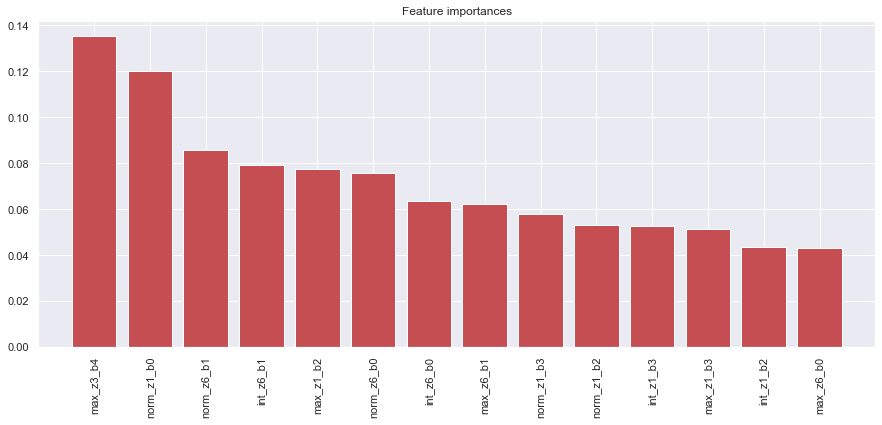

In [249]:
feat_imp = method.feature_importances_

indices = np.argsort(feat_imp)[::-1]

plt.rcParams["figure.figsize"] = (15,6)

plt.title("Feature importances")
plt.xticks(range(df_log.shape[1]),df_log.columns[indices],rotation='vertical')

plt.xlim([-1, df_log.shape[1]])

plt.bar(range(df_log.shape[1]), feat_imp[indices], color="r")


In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## Random Forest
### Reduced dataset

In [251]:
method = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True)

xval_score = cross_val_score(method, df_log_drop, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.7036487322201608, 0.02559363056779695)

In [252]:
method.fit(X_train_drop, y_train_drop)
yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))

print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7309644670050761
Precision: 0.7481481481481481
Recall: 0.8416666666666667
F1 score: 0.792156862745098
[[101  19]
 [ 34  43]]
[[0.84166667 0.15833333]
 [0.44155844 0.55844156]]


### Full dataset

In [253]:
method = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True)

xval_score = cross_val_score(method, df_log, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6996495567924139, 0.03935165251560176)

In [254]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7309644670050761
Precision: 0.7375886524822695
Recall: 0.8666666666666667
F1 score: 0.7969348659003832
[[104  16]
 [ 37  40]]
[[0.86666667 0.13333333]
 [0.48051948 0.51948052]]


## Bagging
### Reduced dataset

In [255]:

method = BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)

xval_score = cross_val_score(method, df_log_drop, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6954442383013811, 0.032359103398833314)

In [256]:
method.fit(X_train_drop, y_train_drop)
yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))

print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

Accuracy: 0.700507614213198
Precision: 0.7293233082706767
Recall: 0.8083333333333333
F1 score: 0.766798418972332
[[97 23]
 [36 41]]
[[0.80833333 0.19166667]
 [0.46753247 0.53246753]]


### Full dataset

In [257]:
xval_score = cross_val_score(method, df_log, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6934137291280148, 0.04149886302799056)

In [258]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.700507614213198
Precision: 0.7479674796747967
Recall: 0.7666666666666667
F1 score: 0.757201646090535
[[92 28]
 [31 46]]
[[0.76666667 0.23333333]
 [0.4025974  0.5974026 ]]
